In [4]:
%%bash

wget --output-document forecasts.csv http://forecaster.rchaves.app/

--2021-05-07 09:58:05--  http://forecaster.rchaves.app/
Resolvendo forecaster.rchaves.app (forecaster.rchaves.app)... 104.21.87.72, 172.67.142.87
Conectando-se a forecaster.rchaves.app (forecaster.rchaves.app)|104.21.87.72|:80... conectado.
A requisição HTTP foi enviada, aguardando resposta... 301 Moved Permanently
Localização: https://forecaster.rchaves.app/ [redirecionando]
--2021-05-07 09:58:05--  https://forecaster.rchaves.app/
Conectando-se a forecaster.rchaves.app (forecaster.rchaves.app)|104.21.87.72|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 6698030 (6,4M) [text/csv]
Salvando em: “forecasts.csv”

     0K .......... .......... .......... .......... ..........  0% 2,45M 3s
    50K .......... .......... .......... .......... ..........  1% 3,93M 2s
   100K .......... .......... .......... .......... ..........  2% 3,82M 2s
   150K .......... .......... .......... .......... ..........  3% 8,54M 2s
   200K .......... .......... ........

In [901]:
import pandas as pd
from yyyy_mm_dd import *
import numpy as np

In [902]:
df = pd.read_csv("forecasts.csv", parse_dates=['timestamp'])
df

,timestamp,type,forecast_delta,city,summary,precipitation,temperature,max,min
0,2021-04-26 07:40:55.852295,daily,0,Amsterdam,Partly Cloudy,1,NaN,11.0,2.0
1,2021-04-26 07:40:55.852295,daily,1,Amsterdam,Partly Cloudy,8,NaN,15.0,4.0
2,2021-04-26 07:40:55.852295,daily,2,Amsterdam,Mostly Sunny,5,NaN,16.0,6.0
3,2021-04-26 07:40:55.852295,daily,3,Amsterdam,Light Rain,82,NaN,11.0,5.0
4,2021-04-26 07:40:55.852295,daily,4,Amsterdam,Showers,47,NaN,12.0,4.0
...,...,...,...,...,...,...,...,...,...
123727,2021-05-09 20:00:41.644181,hourly,43,Cairo,Sunny,0,33.0,NaN,NaN
123728,2021-05-09 20:00:41.644181,hourly,44,Cairo,Sunny,0,32.0,NaN,NaN
123729,2021-05-09 20:00:41.644181,hourly,45,Cairo,Clear,0,29.0,NaN,NaN
123730,2021-05-09 20:00:41.644181,hourly,46,Cairo,Clear,0,28.0,NaN,NaN


In [904]:
ascending_rain = {
    'Sunny': 0,
    'Mostly Sunny': 1,
    'Clear': 2,
    'Mostly Clear': 3,
    'Partly Cloudy': 4,
    'Cloudy': 5,
    'Mostly Cloudy': 6,
    'Few Showers': 7, # https://www.futurelearn.com/info/courses/learn-about-weather/0/steps/28884
    'Showers': 8,
    'Light Rain': 9,
    'Rain': 10,
    'Heavy Rain': 11,
    'T-Showers': 12,
    'Isolated T-Storms': 13, # https://www.weatherstationadvisor.com/isolated-vs-scattered-thunderstorms-what-is-the-difference/
    'Scattered T-Storms': 14,
    'T-Storms': 15,
    'Heavy T-Storms': 16
}

hourly = df[df.type == 'hourly'].copy().reset_index()
hourly = hourly.drop(columns=['min', 'max'])
hourly['rain_level'] = [ ascending_rain[summary.replace(" / Wind", "")] for summary in hourly['summary'] ]
hourly

,index,timestamp,type,forecast_delta,city,summary,precipitation,temperature,rain_level
0,15,2021-04-26 07:40:57.075596,hourly,1,Amsterdam,Partly Cloudy,1,8.0,4
1,16,2021-04-26 07:40:57.075596,hourly,2,Amsterdam,Partly Cloudy,0,9.0,4
2,17,2021-04-26 07:40:57.075596,hourly,3,Amsterdam,Mostly Sunny,0,9.0,1
3,18,2021-04-26 07:40:57.075596,hourly,4,Amsterdam,Mostly Sunny,0,9.0,1
4,19,2021-04-26 07:40:57.075596,hourly,5,Amsterdam,Sunny,0,10.0,0
...,...,...,...,...,...,...,...,...,...
94267,123727,2021-05-09 20:00:41.644181,hourly,43,Cairo,Sunny,0,33.0,0
94268,123728,2021-05-09 20:00:41.644181,hourly,44,Cairo,Sunny,0,32.0,0
94269,123729,2021-05-09 20:00:41.644181,hourly,45,Cairo,Clear,0,29.0,2
94270,123730,2021-05-09 20:00:41.644181,hourly,46,Cairo,Clear,0,28.0,2


In [905]:
hourly['timestamp'] = [ start_of_yyyy_mm_dd_hh(timestamp) for timestamp in hourly['timestamp'] ]
hourly['forecast_for'] = [ move_yyyy_mm_dd_hh(timestamp, delta)
                           for timestamp, delta in zip(hourly['timestamp'], hourly['forecast_delta']) ]
hourly

,index,timestamp,type,forecast_delta,city,summary,precipitation,temperature,rain_level,forecast_for
0,15,2021-04-26 07:00:00,hourly,1,Amsterdam,Partly Cloudy,1,8.0,4,2021-04-26 08:00:00
1,16,2021-04-26 07:00:00,hourly,2,Amsterdam,Partly Cloudy,0,9.0,4,2021-04-26 09:00:00
2,17,2021-04-26 07:00:00,hourly,3,Amsterdam,Mostly Sunny,0,9.0,1,2021-04-26 10:00:00
3,18,2021-04-26 07:00:00,hourly,4,Amsterdam,Mostly Sunny,0,9.0,1,2021-04-26 11:00:00
4,19,2021-04-26 07:00:00,hourly,5,Amsterdam,Sunny,0,10.0,0,2021-04-26 12:00:00
...,...,...,...,...,...,...,...,...,...,...
94267,123727,2021-05-09 20:00:00,hourly,43,Cairo,Sunny,0,33.0,0,2021-05-11 15:00:00
94268,123728,2021-05-09 20:00:00,hourly,44,Cairo,Sunny,0,32.0,0,2021-05-11 16:00:00
94269,123729,2021-05-09 20:00:00,hourly,45,Cairo,Clear,0,29.0,2,2021-05-11 17:00:00
94270,123730,2021-05-09 20:00:00,hourly,46,Cairo,Clear,0,28.0,2,2021-05-11 18:00:00


In [906]:
to_join = hourly[hourly.forecast_delta == 0].drop(columns=['forecast_for']).rename(columns={'timestamp': 'forecast_for'}).set_index(['city', 'forecast_for'])[['rain_level', 'precipitation']].copy()
hourly = hourly.join(
    to_join,
    on=['city', 'forecast_for'],
    how='inner',
    rsuffix="_actual"
)
hourly

,index,timestamp,type,forecast_delta,city,summary,precipitation,temperature,rain_level,forecast_for,rain_level_actual,precipitation_actual
1,16,2021-04-26 07:00:00,hourly,2,Amsterdam,Partly Cloudy,0,9.0,4,2021-04-26 09:00:00,1,0
288,393,2021-04-26 08:00:00,hourly,1,Amsterdam,Partly Cloudy,0,9.0,4,2021-04-26 09:00:00,1,0
576,771,2021-04-26 09:00:00,hourly,0,Amsterdam,Mostly Sunny,0,10.0,1,2021-04-26 09:00:00,1,0
2,17,2021-04-26 07:00:00,hourly,3,Amsterdam,Mostly Sunny,0,9.0,1,2021-04-26 10:00:00,1,0
289,394,2021-04-26 08:00:00,hourly,2,Amsterdam,Partly Cloudy,0,9.0,4,2021-04-26 10:00:00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
93076,122176,2021-05-09 16:00:00,hourly,4,Cairo,Partly Cloudy,1,28.0,4,2021-05-09 20:00:00,4,2
93363,122553,2021-05-09 17:00:00,hourly,3,Cairo,Partly Cloudy,1,29.0,4,2021-05-09 20:00:00,4,2
93650,122930,2021-05-09 18:00:00,hourly,2,Cairo,Partly Cloudy,1,29.0,4,2021-05-09 20:00:00,4,2
93937,123307,2021-05-09 19:00:00,hourly,1,Cairo,Clear,1,29.0,2,2021-05-09 20:00:00,4,2


<AxesSubplot:>

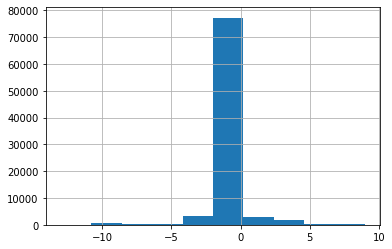

In [907]:
rain_errors = []
for rain_level, rain_level_actual in zip(hourly['rain_level'], hourly['rain_level_actual']):
    rain_start = ascending_rain['Few Showers']
#     rain_errors.append(rain_level_actual - rain_level)
    if rain_level < rain_start and rain_level_actual < rain_start:
        rain_errors.append(0)
    else:
        rain_errors.append(rain_level_actual - rain_level)
    
hourly['rain_error'] = rain_errors
hourly['rain_error'].hist()

<AxesSubplot:>

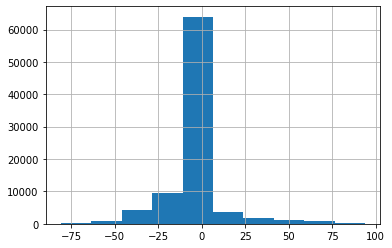

In [908]:
precipitation_errors = []
for precipitation, precipitation_actual in zip(hourly['precipitation'], hourly['precipitation_actual']):
    precipitation_errors.append(precipitation_actual - precipitation)
    
hourly['precipitation_error'] = precipitation_errors
hourly['precipitation_error'].hist()

<AxesSubplot:>

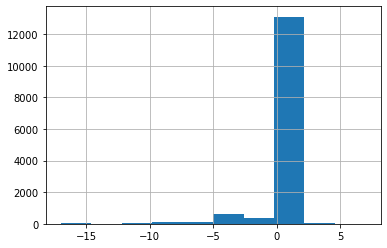

In [909]:
hourly[hourly.city == "Cairo"]['precipitation_error'].hist()

<AxesSubplot:>

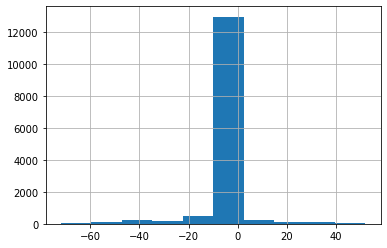

In [910]:
hourly[hourly.city == "Porto Alegre"]['precipitation_error'].hist()

<AxesSubplot:>

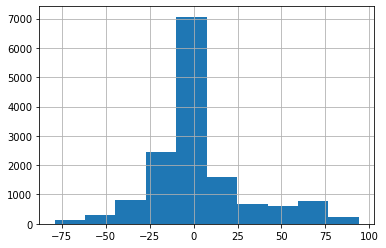

In [911]:
hourly[hourly.city == "Amsterdam"]['precipitation_error'].hist()

<AxesSubplot:>

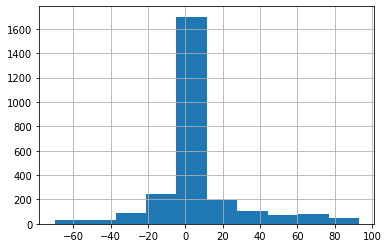

In [912]:
hourly[(hourly.city == "Amsterdam") & (hourly.forecast_delta < 8)]['precipitation_error'].hist()

In [217]:
hourly[(hourly.city == "Amsterdam") & (hourly.forecast_delta == 0)]['precipitation'].describe()

count    263.000000
mean      31.916350
std       38.683002
min        0.000000
25%        2.000000
50%        8.000000
75%       76.500000
max      100.000000
Name: precipitation, dtype: float64

In [218]:
hourly[(hourly.city == "Cairo") & (hourly.forecast_delta == 0)]['precipitation'].describe()

count    261.000000
mean       0.333333
std        1.208941
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       10.000000
Name: precipitation, dtype: float64

In [219]:
hourly[(hourly.city == "Porto Alegre") & (hourly.forecast_delta == 0)]['precipitation'].describe()

count    261.000000
mean      11.961686
std       25.172758
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       94.000000
Name: precipitation, dtype: float64

In [222]:
hourly[(hourly.city == "Cairo") & (hourly.forecast_delta < 5)][["precipitation", "precipitation_actual"]].corr()

,precipitation,precipitation_actual
precipitation,1.000000,0.875388
precipitation_actual,0.875388,1.000000


In [220]:
hourly[(hourly.city == "Porto Alegre") & (hourly.forecast_delta < 5)][["precipitation", "precipitation_actual"]].corr()

,precipitation,precipitation_actual
precipitation,1.000000,0.977562
precipitation_actual,0.977562,1.000000


In [221]:
hourly[(hourly.city == "Amsterdam") & (hourly.forecast_delta < 5)][["precipitation", "precipitation_actual"]].corr()

,precipitation,precipitation_actual
precipitation,1.000000,0.834577
precipitation_actual,0.834577,1.000000


In [497]:
from sklearn.metrics import r2_score, mean_squared_error

slice_ = hourly[(hourly.city == "Amsterdam")]
print("r2", r2_score(slice_['precipitation_actual'], slice_['precipitation']))
print("mse", mean_squared_error(slice_['precipitation_actual'], slice_['precipitation']))
print("rmse", mean_squared_error(slice_['precipitation_actual'], slice_['precipitation'], squared=False))
print("mutual info", mutual_info_regression(np.array(slice_['precipitation']).reshape(-1, 1), slice_['precipitation_actual']))

r2 0.47133384439168624
mse 805.5552620366425
rmse 28.382305439069647
mutual info [0.41576325]


In [496]:
slice_ = hourly[(hourly.city == "Porto Alegre")]
print("r2", r2_score(slice_['precipitation_actual'], slice_['precipitation']))
print("mse", mean_squared_error(slice_['precipitation_actual'], slice_['precipitation']))
print("rmse", mean_squared_error(slice_['precipitation_actual'], slice_['precipitation'], squared=False))
print("mutual info", mutual_info_regression(np.array(slice_['precipitation']).reshape(-1, 1), slice_['precipitation_actual']))

r2 0.7978337381136005
mse 131.43469599861425
rmse 11.464497197810912
mutual info [0.47968935]


In [251]:
slice_ = hourly[(hourly.city == "Cairo")]
print("r2", r2_score(slice_['precipitation_actual'], slice_['precipitation']))
print("mse", mean_squared_error(slice_['precipitation_actual'], slice_['precipitation']))
print("rmse", mean_squared_error(slice_['precipitation_actual'], slice_['precipitation'], squared=False))
print("mutual info", mutual_info_regression(np.array(slice_['precipitation']).reshape(-1, 1), slice_['precipitation_actual']))

r2 -0.4765020284948758
mse 1.9301922743807378
rmse 1.3893135982854043
mutual info [0.19131388]


<AxesSubplot:title={'center':'Cairo 5h'}, xlabel='precipitation', ylabel='precipitation_actual'>

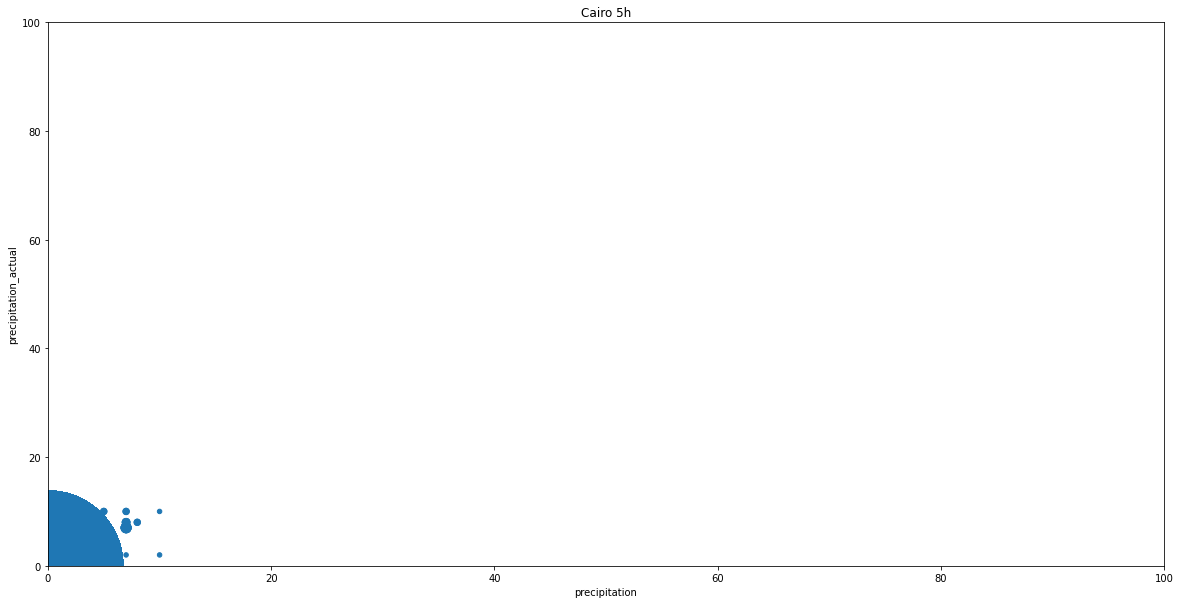

In [362]:
slice_ = hourly[(hourly.city == "Cairo") & (hourly.forecast_delta < 5)]
grouped = slice_.groupby(['precipitation', 'precipitation_actual'])[['city']].count()
sizes = [ grouped.loc[index][0] * 20 for index in zip(slice_.precipitation, slice_.precipitation_actual) ]
slice_.plot.scatter(
    x="precipitation", y="precipitation_actual", s=sizes, figsize=(20,10),
    xlim=(0, 100), ylim=(0, 100), title="Cairo 5h")

<AxesSubplot:title={'center':'Porto Alegre 5h'}, xlabel='precipitation', ylabel='precipitation_actual'>

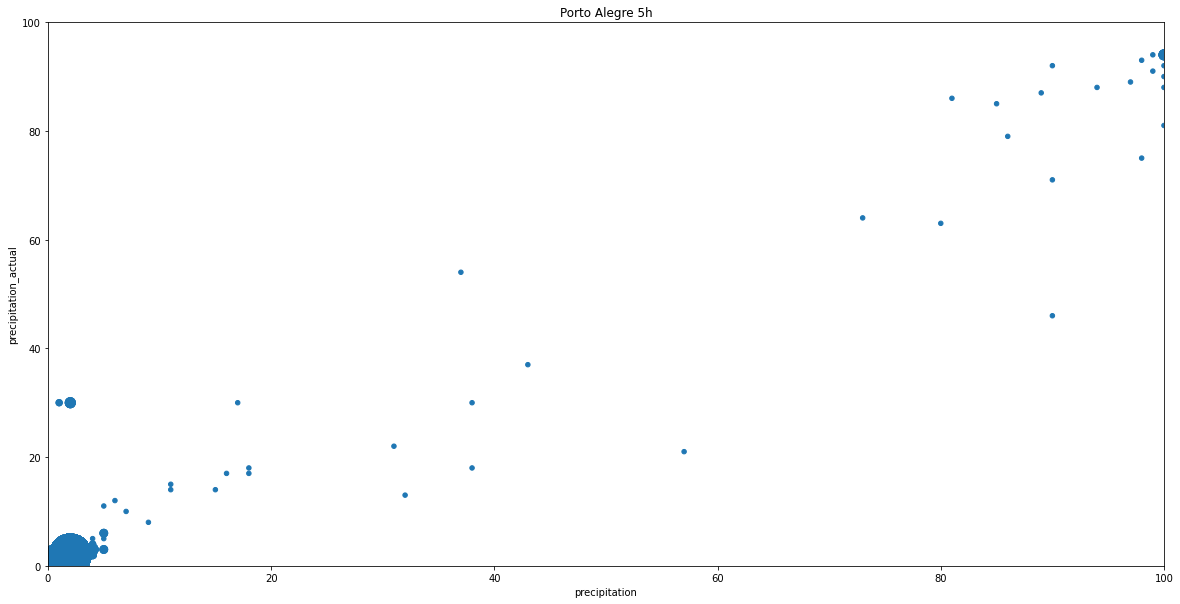

In [367]:
slice_ = hourly[(hourly.city == "Porto Alegre") & (hourly.forecast_delta < 5)]
grouped = slice_.groupby(['precipitation', 'precipitation_actual'])[['city']].count()
sizes = [ grouped.loc[index][0] * 20 for index in zip(slice_.precipitation, slice_.precipitation_actual) ]
slice_.plot.scatter(
    x="precipitation", y="precipitation_actual", s=sizes, figsize=(20,10),
    xlim=(0, 100), ylim=(0, 100), title="Porto Alegre 5h")

<AxesSubplot:title={'center':'Amsterdam 5h'}, xlabel='precipitation', ylabel='precipitation_actual'>

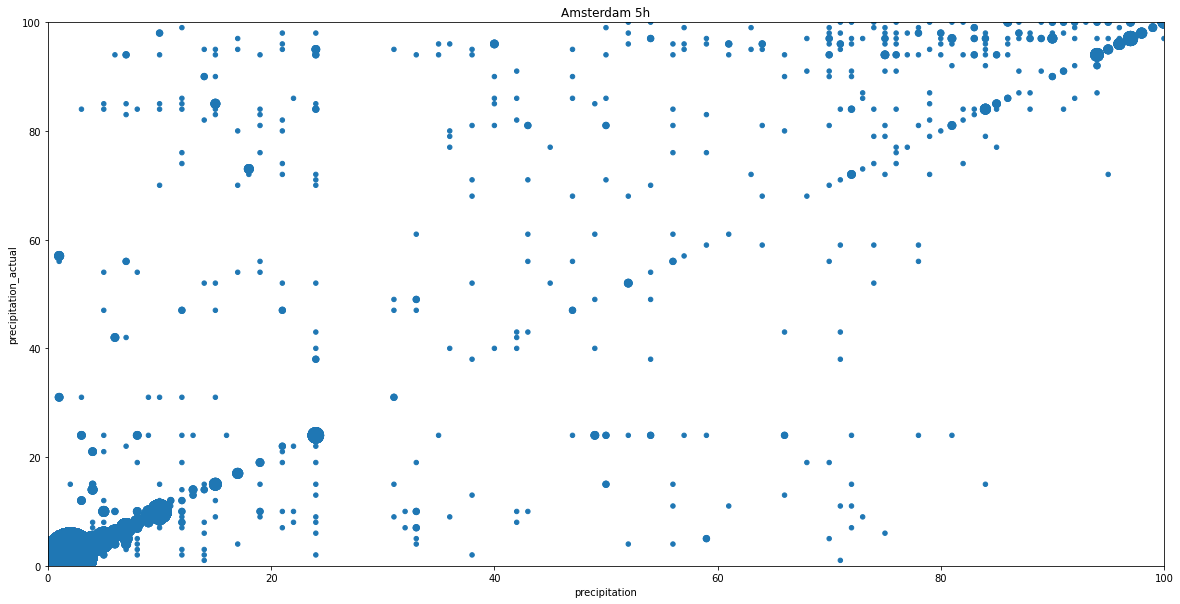

In [370]:
slice_ = hourly[(hourly.city == "Amsterdam") & (hourly.forecast_delta < 5)]
grouped = slice_.groupby(['precipitation', 'precipitation_actual'])[['city']].count()
sizes = [ grouped.loc[index][0] * 20 for index in zip(slice_.precipitation, slice_.precipitation_actual) ]
slice_.plot.scatter(
    x="precipitation", y="precipitation_actual", s=sizes, figsize=(20,10),
    xlim=(0, 100), ylim=(0, 100), title="Amsterdam 5h")

<AxesSubplot:title={'center':'Amsterdam 5h only'}, xlabel='precipitation', ylabel='precipitation_actual'>

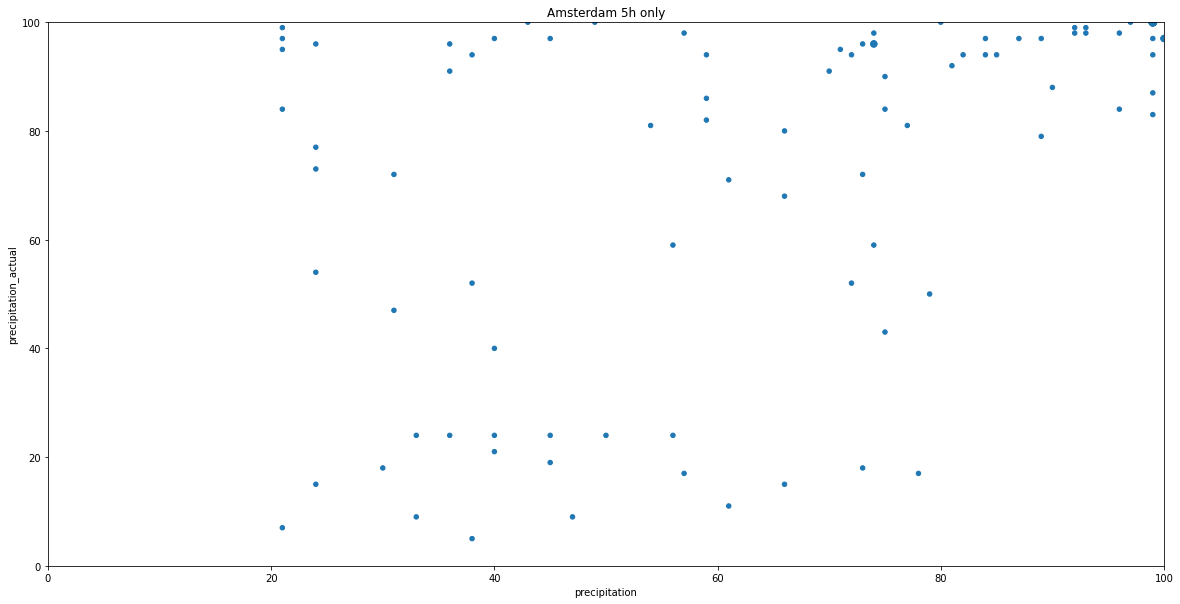

In [918]:
slice_ = hourly[(hourly.city == "Amsterdam") & (hourly.forecast_delta == 5) & (hourly.precipitation > 20)]
grouped = slice_.groupby(['precipitation', 'precipitation_actual'])[['city']].count()
sizes = [ grouped.loc[index][0] * 20 for index in zip(slice_.precipitation, slice_.precipitation_actual) ]
slice_.plot.scatter(
    x="precipitation", y="precipitation_actual", s=sizes, figsize=(20,10),
    xlim=(0, 100), ylim=(0, 100), title="Amsterdam 5h only")

In [391]:
def fixed_ranged_predictions(city):
    print("Fixed ranged predictions for", city)
    slice_ = hourly[(hourly.city == city) & (hourly.forecast_delta > 0) & (hourly.forecast_delta <= 5)]
    
    total = len(slice_)
    correct = 0
    for _, prediction in slice_.iterrows():
        pred_min = prediction.precipitation - 5
        pred_max = prediction.precipitation + 5
        actual = prediction.precipitation_actual
        if actual >= pred_min and actual <= pred_max:
            correct += 1
    print("Predictions in range:", correct, "/", total, "(%.1f%%)" % (correct / total * 100), "\n")
    
    
fixed_ranged_predictions('Amsterdam')
fixed_ranged_predictions('Porto Alegre')
fixed_ranged_predictions('Cairo')

Fixed ranged predictions for Amsterdam
Predictions in range: 783 / 1324 (59.1%) 

Fixed ranged predictions for Porto Alegre
Predictions in range: 1142 / 1304 (87.6%) 

Fixed ranged predictions for Cairo
Predictions in range: 1299 / 1304 (99.6%) 



In [863]:
scores = []
range_margins = []

def ranged_predictions(city):
    global scores, range_sizes
    
    print("Ranged predictions for", city)
    max_hours = 5
    slice_ = hourly[(hourly.city == city) & (hourly.precipitation > 20) & (hourly.forecast_delta > 0) & (hourly.forecast_delta <= max_hours)]
    
    margin = {}
    for i in range(1, max_hours + 1):
        delta_i_forecasts = slice_[slice_.forecast_delta == i]
        margin[i] = mean_squared_error(delta_i_forecasts['precipitation_actual'], delta_i_forecasts['precipitation'], squared=False)
#         margin[i] = delta_i_forecasts['precipitation_actual'].mean()
#         margin[i] = math.sqrt(math.sqrt(root_mean_quad_error(delta_i_forecasts['precipitation_actual'], delta_i_forecasts['precipitation'])))
#         margin[i] = delta_i_forecasts['precipitation_actual'].std()
#         margin[i] = np.mean([ abs(actual - pred) for actual, pred in zip(delta_i_forecasts['precipitation_actual'], delta_i_forecasts['precipitation'])])
    
    total = len(slice_)
    correct = 0
    for _, prediction in slice_.iterrows():
        precipitation = prediction.precipitation
        delta = prediction.forecast_delta
#         pred_min = max(min(precipitation, precipitation - means[delta] - margin[delta]), 0)
#         pred_max = min(max(precipitation, precipitation + means[delta] + margin[delta]), 100)
        pred_min = max(precipitation - margin[delta], 0)
        pred_max = min(precipitation + margin[delta], 100)
        
        range_margins.append(pred_max - pred_min)
#         if delta == 5:
#             print("delta", delta, "original", precipitation, "range", (pred_min, pred_max))
        
        actual = prediction.precipitation_actual
        if actual >= pred_min and actual <= pred_max:
            correct += 1
    print("Predictions in range:", correct, "/", total, "(%.1f%%)" % (correct / total * 100), "\n")
    scores.append(correct / total * 100)
    
ranged_predictions('Amsterdam')
# ranged_predictions('Porto Alegre')
# ranged_predictions('Cairo')
print("Avg scores", "(%.1f%%)" % np.mean(scores))
print("Avg range sizes", "%.1f" % np.mean(range_margins))
print("Score", "%.0f" % ((np.mean(scores) ** 2 - np.mean(range_margins) ** 2) / 100))

Ranged predictions for Amsterdam
Predictions in range: 308 / 432 (71.3%) 

Avg scores (71.3%)
Avg range sizes 55.3
Score 20


In [889]:
scores = []
range_margins = []

def ranged_predictions(city):
    global scores, range_sizes
    
    print("Ranged predictions for", city)
    max_hours = 5
    slice_ = hourly[(hourly.city == city) & (hourly.forecast_delta > 0) & (hourly.forecast_delta <= max_hours)]
    
    stds = {}
    means = {}
    for i in range(1, max_hours + 1):
        delta_i_forecasts = slice_[slice_.forecast_delta == i]
        stds[i] = delta_i_forecasts['precipitation_actual'].std()
        means[i] = delta_i_forecasts['precipitation_actual'].mean()
    
    total = len(slice_)
    correct = 0
    for _, prediction in slice_.iterrows():
        precipitation = prediction.precipitation
        delta = prediction.forecast_delta
        pred_min = max(min(precipitation, precipitation - means[delta] - stds[delta]), 0)
        pred_max = min(max(precipitation, precipitation + means[delta] + stds[delta]), 100)
        range_margins.append(pred_max - pred_min)
        
#         if delta == 5:
#             print("delta", delta, "original", precipitation, "range", (pred_min, pred_max))
        
        actual = prediction.precipitation_actual
        if actual >= pred_min and actual <= pred_max:
            correct += 1
    print("Predictions in range:", correct, "/", total, "(%.1f%%)" % (correct / total * 100), "\n")
    scores.append(correct / total * 100)
    
ranged_predictions('Amsterdam')
ranged_predictions('Porto Alegre')
ranged_predictions('Cairo')
print("Avg scores", "(%.1f%%)" % np.mean(scores))
print("Avg range sizes", "%.1f" % np.mean(range_margins))
print("Score", "%.0f" % ((np.mean(scores) ** 2 - (np.mean(range_margins) * 2) ** 2) / 100))

Ranged predictions for Amsterdam
Predictions in range: 1269 / 1324 (95.8%) 

Ranged predictions for Porto Alegre
Predictions in range: 1300 / 1304 (99.7%) 

Ranged predictions for Cairo
Predictions in range: 1278 / 1304 (98.0%) 

Avg scores (97.8%)
Avg range sizes 41.3
Score 28


In [682]:
mses = []

def adjusted_predictions(city):
    global mses
    
    print("Ranged predictions for", city)
    max_hours = 48
    slice_ = hourly[(hourly.city == city) & (hourly.forecast_delta > 0) & (hourly.forecast_delta <= max_hours)].copy()
    slice_.precipitation = round(slice_.precipitation / 10)
    slice_.precipitation_actual = round(slice_.precipitation_actual / 10)
    
#     means = {}
#     for i in range(1, max_hours + 1):
#         delta_i_forecasts = slice_[slice_.forecast_delta == i]
#         means[i] = delta_i_forecasts['precipitation_actual'].mean()
    
    predictions = []
    memo_table = {}
    for _, prediction in slice_.iterrows():
        suggested = prediction.precipitation
        delta = prediction.forecast_delta
        
        highest_chance = 0
        most_likely = None
        for actual in range(0, 11):
            if (delta, suggested, actual) in memo_table:
                p_actual_given_delta_and_suggested = memo_table[(delta, suggested, actual)]
            else:
                p_suggested_given_actual = len(slice_[(slice_.precipitation == suggested) & (slice_.precipitation_actual == actual)]) / max(len(slice_[slice_.precipitation_actual == actual]), 0.01)
                p_delta_given_actual = len(slice_[(slice_.forecast_delta == delta) & (slice_.precipitation_actual == actual)]) / max(len(slice_[slice_.precipitation_actual == actual]), 0.01)
                p_actual = len(slice_[slice_.precipitation_actual == actual]) / len(slice_)
                p_b = len(slice_[(slice_.forecast_delta == delta) & (slice_.precipitation == suggested)]) / len(slice_)

                p_actual_given_delta_and_suggested = (p_suggested_given_actual * p_delta_given_actual * p_actual) / p_b
#                 print("p_actual_given_delta_and_suggested", p_actual_given_delta_and_suggested)
                memo_table[(delta, suggested, actual)] = p_actual_given_delta_and_suggested
            
            if p_actual_given_delta_and_suggested > highest_chance:
                highest_chance = p_actual_given_delta_and_suggested
                most_likely = actual
        
        precipitation = most_likely # p_precipitation_given_prediction # means[delta] #(precipitation + means[delta]) / 2
#         precipitation = means[delta]
#         precipitation = suggested
#         if delta == 5:
#             print("precipitation", suggested * 10, "=>", precipitation * 10)
        
        predictions.append(precipitation)
    
    mses.append(mean_squared_error(slice_['precipitation_actual'], predictions))
    
adjusted_predictions('Amsterdam')
# ranged_predictions('Porto Alegre')
# ranged_predictions('Cairo')
print("Avg mses", np.mean(mses))

Ranged predictions for Amsterdam
Avg mses 12.716701534170154


Ranged predictions for Amsterdam
Avg mses 1406.723133311098


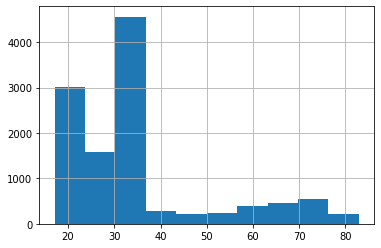

In [754]:
mses = []

def adjusted_predictions(city):
    global mses
    
    print("Ranged predictions for", city)
    max_hours = 48
    slice_ = hourly[(hourly.city == city) & (hourly.forecast_delta > 0) & (hourly.forecast_delta <= max_hours)].copy()
#     slice_.precipitation = round(slice_.precipitation / 10)
#     slice_.precipitation_actual = round(slice_.precipitation_actual / 10)
    
    adjusts = {}
    for i in range(1, max_hours + 1):
        delta_i_forecasts = slice_[slice_.forecast_delta == i]
        adjusts[i] = mean_squared_error(delta_i_forecasts['precipitation_actual'], delta_i_forecasts['precipitation'], squared=False)
    
    mean = slice_['precipitation_actual'].mean()
#     print("mean", mean)
#     print("adjusts", adjusts)
    
    predictions = []
    memo_table = {}
    for _, prediction in slice_.iterrows():
        suggested = prediction.precipitation
        delta = prediction.forecast_delta
        if suggested < mean:
#             precipitation = suggested + ((means[delta] - suggested) / 10 ** 2)
            precipitation = min(suggested + adjusts[i] / 2, mean)
        else:
            precipitation = max(suggested - adjusts[i] / 2, mean)
#             precipitation = suggested - ((suggested - means[delta]) / 10 ** 2)
#         precipitation = mean
#         precipitation = suggested
        precipitation = max(min(precipitation, 100), 0)
    
#         if delta == 5:
#             print("precipitation", suggested, "=>", precipitation)
        
        predictions.append(precipitation)
    
    mses.append(root_mean_quad_error(slice_['precipitation_actual'], predictions))
    pd.Series(predictions).hist()
    
adjusted_predictions('Amsterdam')
# adjusted_predictions('Porto Alegre')
# adjusted_predictions('Cairo')
print("Avg mses", np.mean(mses))

In [738]:
def root_mean_quad_error(y_true, y_pred):
    return np.sqrt(np.sum([ (true - pred) ** 4 for true, pred in zip(y_true, y_pred) ]) / len(y_true))
    
y_true = [5,5,5,5]
y_pred = [5,6,7,10]
mean_squared_error(y_true, y_pred)
root_mean_quad_error(y_true, y_pred)

12.668859459319927

<AxesSubplot:xlabel='rain_level', ylabel='rain_level_actual'>

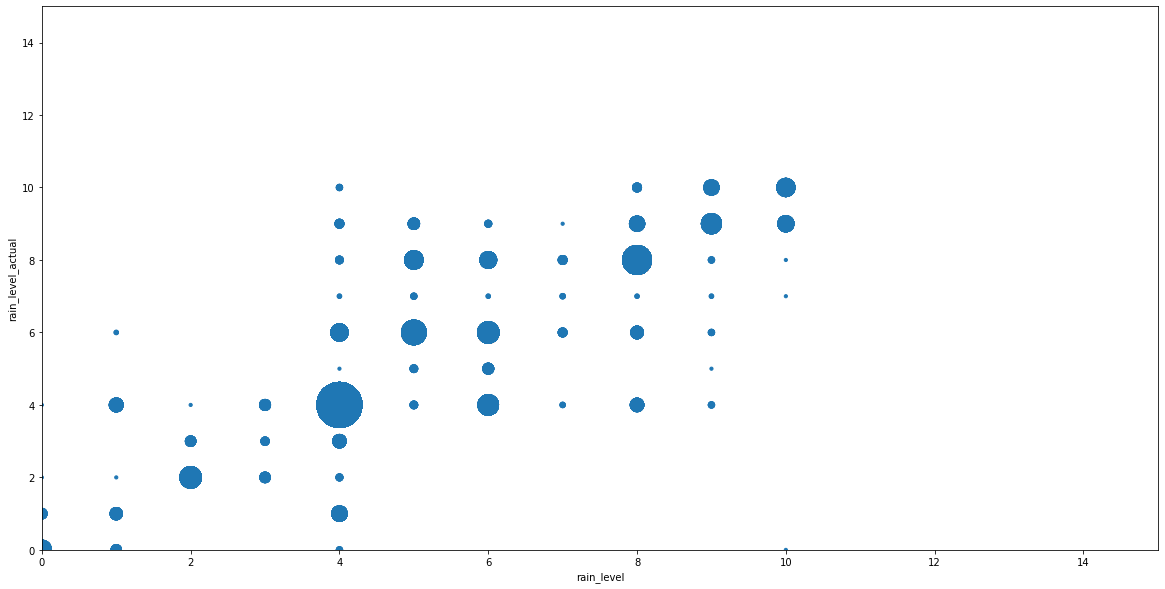

In [884]:
slice_ = hourly[(hourly.city == "Amsterdam") & (hourly.forecast_delta > 0) & (hourly.forecast_delta < 5)]
grouped = slice_.groupby(['rain_level', 'rain_level_actual'])[['city']].count()
sizes = [ grouped.loc[index][0] * 10 for index in zip(slice_.rain_level, slice_.rain_level_actual) ]
slice_.plot.scatter(
    x="rain_level", y="rain_level_actual", s=sizes, figsize=(20,10),
    xlim=(0, 15), ylim=(0, 15))